# Feature Engineering

## Opurtunity Table

In [279]:
df_op.head()

,ACCOUNT_ID,OPPORTUNITY_ID,RENEWAL_DATE_C,PRODUCT_CODE,NAME,QUANTITY,START_DATE_C,END_DATE_C,IS_WON
0,acc1,opp1,2020-04-23,SS_550_AN_P2,PlanGrid (Nailgun - 550 Sheets),4,2020-04-24,2021-04-23,NaN
1,acc1,opp1,2020-04-23,SS_5K_AN_P2,PlanGrid (Dozer - 5000 Sheets),2,2020-04-24,2021-04-23,NaN
2,acc2,opp2,2020-04-16,SS_INF_AN_P2,PlanGrid (Crane - Infinite Sheets),1,2020-04-17,2021-04-16,True
3,acc2,opp2,2020-04-16,SS_5K_AN_P2,PlanGrid (Dozer - 5000 Sheets),8,2020-04-17,2021-04-16,True
4,acc3,opp3,2020-04-09,SS_5K_AN_P2,PlanGrid (Dozer - 5000 Sheets),3,2020-04-10,2021-04-09,True


In [280]:
# We just keep these columns, becasue others do not effect our target value
df_op2=df_op[['OPPORTUNITY_ID','RENEWAL_DATE_C','ACCOUNT_ID','NAME','IS_WON']]
df_op2.head()

,OPPORTUNITY_ID,RENEWAL_DATE_C,ACCOUNT_ID,NAME,IS_WON
0,opp1,2020-04-23,acc1,PlanGrid (Nailgun - 550 Sheets),NaN
1,opp1,2020-04-23,acc1,PlanGrid (Dozer - 5000 Sheets),NaN
2,opp2,2020-04-16,acc2,PlanGrid (Crane - Infinite Sheets),True
3,opp2,2020-04-16,acc2,PlanGrid (Dozer - 5000 Sheets),True
4,opp3,2020-04-09,acc3,PlanGrid (Dozer - 5000 Sheets),True


In [281]:
df_op2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   OPPORTUNITY_ID  1000 non-null   object
 1   RENEWAL_DATE_C  1000 non-null   object
 2   ACCOUNT_ID      1000 non-null   object
 3   NAME            1000 non-null   object
 4   IS_WON          580 non-null    object
dtypes: object(5)
memory usage: 39.2+ KB


We can see that type of "RENEWAL_DATE_C" is not Date, so we should convert it.

In [ ]:
df_op2.RENEWAL_DATE_C= pd.to_datetime(df_op2.RENEWAL_DATE_C,format='%Y-%m-%d')


In [283]:
#Now we can see the Date type
df_op2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   OPPORTUNITY_ID  1000 non-null   object        
 1   RENEWAL_DATE_C  1000 non-null   datetime64[ns]
 2   ACCOUNT_ID      1000 non-null   object        
 3   NAME            1000 non-null   object        
 4   IS_WON          580 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 39.2+ KB


In [284]:
df_op2.nunique(axis=0)

OPPORTUNITY_ID    536
RENEWAL_DATE_C     30
ACCOUNT_ID        527
NAME               20
IS_WON              2
dtype: int64

"NAME" of products are important for us because it can affect our target value. We can see there are 30 different product name. So we want to know about the distribution of these products

In [285]:
df_op2['NAME'].value_counts(dropna=False)

PlanGrid (Dozer - 5000 Sheets)                           347
PlanGrid (Nailgun - 550 Sheets)                          281
PlanGrid (Crane - Infinite Sheets)                       115
PlanGrid (Workspaces)                                     99
PlanGrid (Admin Console)                                  97
PlanGrid (Submittals - Up to 50 Users)                    18
PlanGrid (Advanced RFIs)                                  15
PlanGrid (Enterprise Subscription - Unlimited Sheets)      7
PlanGrid (Developer API Access)                            5
PlanGrid (Automatic Submittal Log - Up to 50 Users)        4
PlanGrid (Quick Start Webinar)                             2
PlanGrid (Single Sign-On - Up to 50 Users)                 2
Connect Platform                                           1
PlanGrid (Automatic Submittal Log - Up to 500 Users)       1
PlanGrid (Submittals - Up to 500 Users)                    1
PlanGrid (Automatic Submittal Log - Up to 200 Users)       1
PlanGrid (Automatic Subm

We just keep 7 of them because others are renew less than 10 times. We categorized them as "Other_Plan" 

In [ ]:
Minor_product=['PlanGrid (Enterprise Subscription - Unlimited Sheets)','PlanGrid (Developer API Access)' \
               ,'PlanGrid (Automatic Submittal Log - Up to 50 Users)','PlanGrid (Quick Start Webinar)' \
               ,'PlanGrid (Single Sign-On - Up to 50 Users)','Connect Platform' \
               ,'PlanGrid (Automatic Submittal Log - Up to 500 Users)','PlanGrid (Submittals - Up to 500 Users)' \
               ,'PlanGrid (Automatic Submittal Log - Up to 200 Users)','PlanGrid (Automatic Submittal Log - Unlimited Users)' \
               ,'PlanGrid (Submittals - Unlimited Users)','PlanGrid (Single Sign-On - Up to 200 Users)' \
               ,'PlanGrid (Submittals - Up to 200 Users)']
for i in Minor_product:
    df_op2['NAME'].replace(i,'Other_Plan',inplace=True)


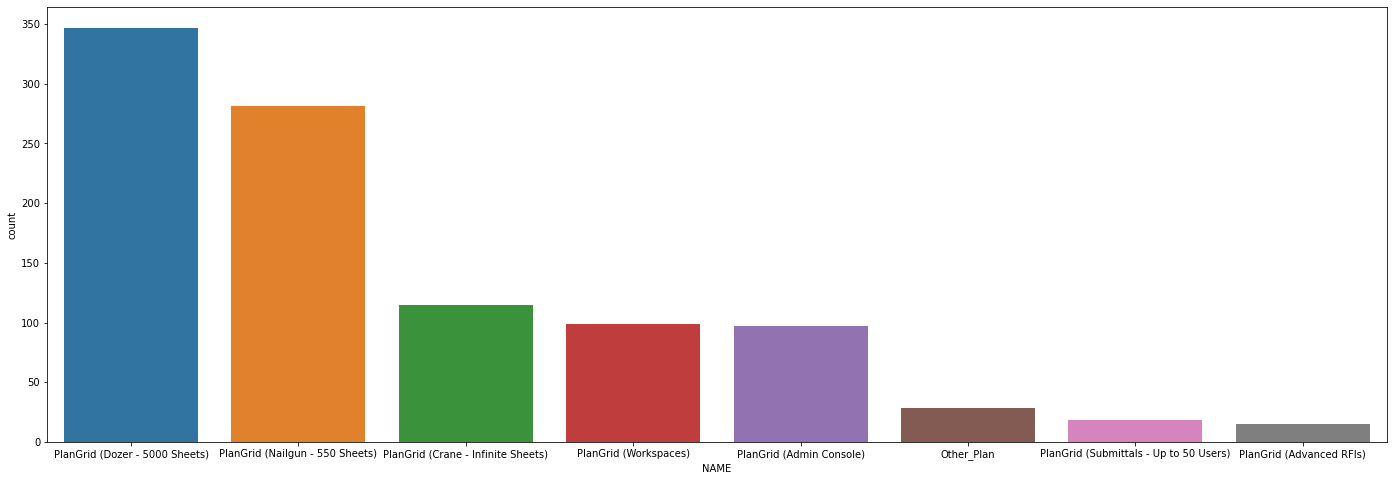

In [287]:
plt.figure(figsize=(24,8))
sns.countplot(data=df_op2, x='NAME',order = df_op2['NAME'].value_counts().index)
plt.show()

In the original table, some opportunities related to more than one products. First we use One-hot encoding "NAME" that creates 8 new features. Then we group the table based on "OPPORTUNITY_ID". So it means now we have just 1 row for each opportunity, and each opportunity related to specefic plan if the value equal to 1. For example, in the below table, you can see thay opp1 is related to two plans (PlanGrid (Dozer - 5000 Sheets) & PlanGrid (Nailgun - 550 Sheets))

In [288]:
df_op3 =df_op2[['OPPORTUNITY_ID','RENEWAL_DATE_C','ACCOUNT_ID','IS_WON']].join(pd.get_dummies(df_op2['NAME'])).groupby('OPPORTUNITY_ID').max()
df_op3.reset_index(inplace=True)
df_op3.head()

,OPPORTUNITY_ID,RENEWAL_DATE_C,ACCOUNT_ID,IS_WON,Other_Plan,PlanGrid (Admin Console),PlanGrid (Advanced RFIs),PlanGrid (Crane - Infinite Sheets),PlanGrid (Dozer - 5000 Sheets),PlanGrid (Nailgun - 550 Sheets),PlanGrid (Submittals - Up to 50 Users),PlanGrid (Workspaces)
0,opp1,2020-04-23,acc1,NaN,0,0,0,0,1,1,0,0
1,opp10,2020-04-23,acc10,NaN,0,0,0,1,1,0,0,0
2,opp100,2020-04-29,acc100,NaN,0,0,0,0,0,1,1,0
3,opp101,2020-04-15,acc101,True,0,1,0,0,1,0,0,0
4,opp102,2020-04-30,acc102,NaN,0,0,0,0,1,0,0,0


## Event Table

In [289]:
df_ev.head()

,ACCOUNT_ID,ORGANIZATION_ID,USER_ID,PROJECT_ID,EVENT_TIME,EVENT_TYPE,EVENT_COUNT
0,acc420,org1,u1,p1,2019-05-10,sheet.view,3
1,acc399,org2,u2,p2,2019-05-06,attachment.list.folder.filter,1
2,acc399,org2,u3,p3,2019-06-24,sheet.list.filter.select,2
3,acc122,org3,u4,p4,2019-04-30,sheet.list.filters.view,1
4,acc61,org4,u5,p5,2019-08-07,sheet.list,1


In [290]:
df_ev.nunique(axis=0)

ACCOUNT_ID           496
ORGANIZATION_ID      602
USER_ID             5209
PROJECT_ID         25071
EVENT_TIME           213
EVENT_TYPE          1180
EVENT_COUNT         1455
dtype: int64

In this table, "EVENT_TYPE" is important feature for us. We can see there is 1180 event types. So we need to group them to decrease the complexity

In [291]:
# Most frequent event Type
100*(df_ev['EVENT_TYPE'].value_counts(dropna=False)[:20])/7226175

sheet.list                 6.084990
sheet.view                 5.820991
project.list.select        5.385270
sheet.links.appear         3.628766
sheet.gesture              2.668230
project.list.scroll        2.023505
project.home.enter         1.977962
attachment.list.view       1.888288
project.update.complete    1.749847
sheet.list.filters.view    1.716302
project.update.download    1.420364
annotation.create          1.295679
sheet.list.filter          1.251506
attachment.view            1.251326
home.pane.click            1.147329
annotation.link.view       1.081208
sheet.sheet.load           1.017551
sheet.list.search          0.913305
project.list.click         0.901653
sheet.list.search.focus    0.882597
Name: EVENT_TYPE, dtype: float64

In [292]:
df_ev2=df_ev.copy()

At the first try, we group "EVENT_TYPE" based on the first word. For example, we group all "issue...." to gether.

In [293]:
d = {'account':'account','annotation':'annotation' \
     ,'attachment':'attachment','comment':'comment','documents':'documents','ec':'ec' \
     ,'field_report':'field_report','home':'home','issue':'issue','link':'link' \
     ,'measurement':'measurement','mention':'mention','more':'more','nav':'nav' \
     ,'onboarding':'onboarding','pg_form':'pg_form','photo':'photo','project.':'project' \
     ,'projecthub':'projecthub','project_profile':'project_profile','pspdfkit':'pspdfkit','punchlist':'punchlist' \
     ,'reference':'reference','rfilist':'rfilist','rfis2':'rfis2','sheet_compare':'sheet_compare' \
     ,'sheet.':'sheet','sheets':'sheets','snapshot':'snapshot','submittals':'submittals','team':'team' \
     ,'tooltip':'tooltip','upload':'upload','version_set':'version_set','workspace':'workspace' \
     ,'rfi':'rfi','bim':'bim','action_center':'action_center','article':'article'\
     ,'asbuilt':'asbuilt','map':'map','feedback_form':'feedback_form','mytags':'mytags' \
     ,'manage_storage':'manage_storage','export':'export','polyline':'polyline','web':'web' \
     ,'learn_plangrid':'learn_plangrid','selfies':'selfies','polycloud':'polycloud' \
     ,'collaborator':'collaborator','whatsnew':'whatsnew'}

for k, v in d.items():
    df_ev2.loc[df_ev2['EVENT_TYPE'].str.startswith(k, na=False), 'EVENT_TYPE'] = v

In [294]:
100*(df_ev2['EVENT_TYPE'].value_counts(dropna=False)[:])/7226175

sheet              41.847644
project            18.811515
annotation          7.229219
attachment          6.808886
issue               6.536709
field_report        2.907140
nav                 2.756756
photo               2.515771
projecthub          2.366286
action_center       1.836421
home                1.445675
link                0.850519
team                0.770754
ec                  0.277865
rfi                 0.273907
comment             0.262324
measurement         0.239131
sheet_compare       0.237000
reference           0.231090
more                0.184067
pspdfkit            0.182351
snapshot            0.170381
article             0.156127
punchlist           0.138151
tooltip             0.136019
account             0.109422
pg_form             0.106585
version_set         0.103457
documents           0.101714
submittals          0.089245
onboarding          0.065678
project_profile     0.061042
mention             0.035261
workspace           0.032673
upload        

So now it is much better. But "Sheet" and "Project" seems very frequent, so we need to break these two. We saw earlier which event_type are most frequent, so we use more detailed event type for these two. Also, we group least frequent ones as "Others"

In [295]:
df_ev3=df_ev.copy()

In [296]:
d = {'account':'Other','annotation':'annotation' \
     ,'attachment':'attachment','comment':'Other','documents':'Other','ec':'Other' \
     ,'field_report':'field_report','home':'home','issue':'issue','link':'link' \
     ,'measurement':'Other','mention':'Other','more':'Other','nav':'nav' \
     ,'onboarding':'Other','pg_form':'Other','photo':'photo' \
     ,'projecthub':'projecthub','pspdfkit':'Other','punchlist':'Other' \
     ,'reference':'Other','rfilist':'rfilist','rfis2':'rfis2','sheet_compare':'Other' \
     ,'snapshot':'Other','submittals':'Other','team':'team' \
     ,'tooltip':'Other','upload':'Other','version_set':'Other','workspace':'Other' \
     ,'rfi':'Other','bim':'Other','action_center':'action_center','article':'Other'\
     ,'asbuilt':'Other','map':'Other','feedback_form':'Other','mytags':'Other' \
     ,'manage_storage':'Other','export':'Other','polyline':'Other','web':'Other' \
     ,'learn_plangrid':'Other','selfies':'Other','polycloud':'Other' \
     ,'collaborator':'Other','whatsnew':'Other','update_profile':'Other' \
     ,'project_profile':'Other','sheets':'Other','sheet.list':'_sheet.list' \
     ,'sheet.view':'_sheet.view','project.list':'_project.list' \
     ,'sheet.links':'_sheet.links','sheet.gesture':'_sheet.gesture' \
     ,'project.home':'_project.home','project.update':'_project.update','sheet.sheet':'_sheet.sheet'}

for k, v in d.items():
    df_ev3.loc[df_ev3['EVENT_TYPE'].str.startswith(k, na=False), 'EVENT_TYPE'] = v

In [297]:
d2={'sheet.':'sheet','project.':'project'}
for k, v in d2.items():
    df_ev3.loc[df_ev3['EVENT_TYPE'].str.startswith(k, na=False), 'EVENT_TYPE'] = v

In [298]:
100*(df_ev3['EVENT_TYPE'].value_counts(dropna=False)[:])/7226175

_sheet.list        15.829979
sheet              10.136677
_project.list       9.382184
annotation          7.229219
attachment          6.808886
issue               6.536709
_sheet.view         5.828104
_project.update     4.199898
_sheet.links        3.796601
_sheet.sheet        3.588053
Other               3.316706
project             3.251471
field_report        2.907140
nav                 2.756756
_sheet.gesture      2.668230
photo               2.515771
projecthub          2.366286
_project.home       1.977962
action_center       1.836421
home                1.445675
link                0.850519
team                0.770754
Name: EVENT_TYPE, dtype: float64

In [299]:
df_ev4=df_ev3.copy()

So we reduce "EVENT_type" feature to 22 different categories. Also, you can find the distribution in below. 

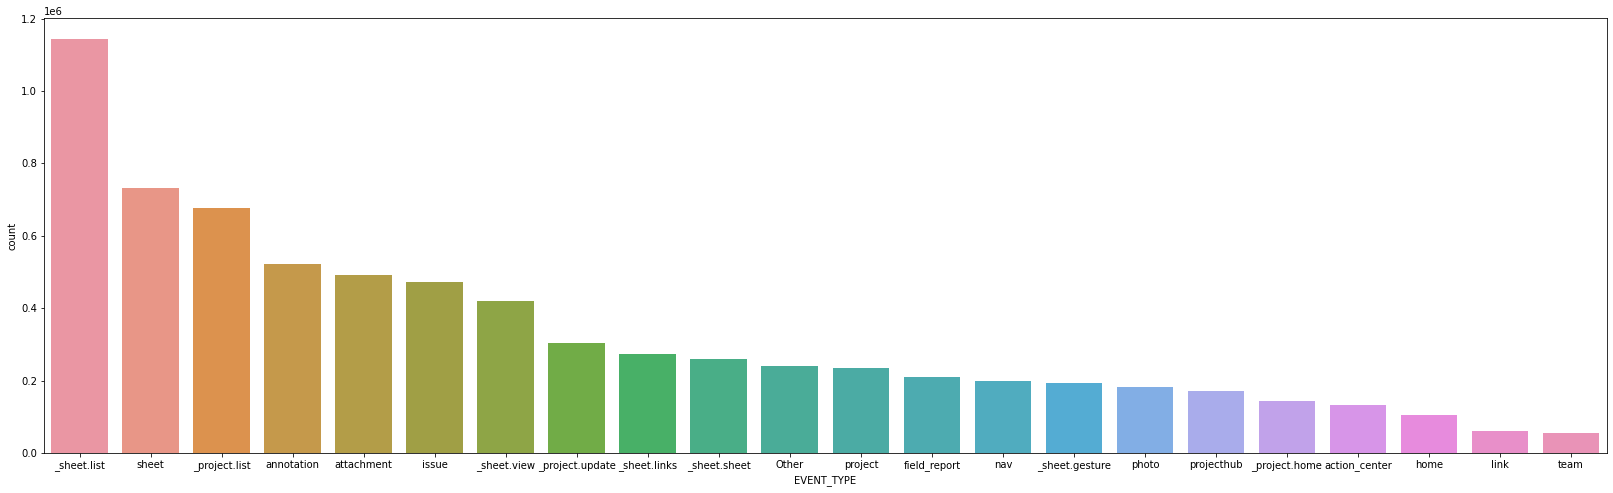

In [300]:
plt.figure(figsize=(28,8))
sns.countplot(data=df_ev4, x='EVENT_TYPE',order = df_ev4['EVENT_TYPE'].value_counts().index)
plt.show()

In [301]:
#We just need these two features from this table. Others do not affect target value
df_ev5=df_ev4[['ACCOUNT_ID','EVENT_TYPE']]

Again, like previous case, we use One-hot encoding for "EVENT_type" and group based on "ACCOUNT_ID". For example, you can find event types for each account in the below

In [302]:
df_ev6 =df_ev5[['ACCOUNT_ID']].join(pd.get_dummies(df_ev5['EVENT_TYPE'])).groupby('ACCOUNT_ID').max()
df_ev6.reset_index(inplace=True)
df_ev6.head()

,ACCOUNT_ID,Other,_project.home,_project.list,_project.update,_sheet.gesture,_sheet.links,_sheet.list,_sheet.sheet,_sheet.view,...,field_report,home,issue,link,nav,photo,project,projecthub,sheet,team
0,acc1,1,1,1,0,0,0,1,1,1,...,0,1,1,0,1,1,1,0,0,1
1,acc10,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,acc100,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,acc101,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,0,1,1
4,acc102,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


## Combine Two Tables

In [ ]:

#store table in the database:
df_op3.to_sql('Opportunity_New', connection)
df_ev6.to_sql('Event_New', connection)

In [304]:
sql_7='Select * \
From Opportunity_New t1 Left Join Event_New t2 ON t1.ACCOUNT_ID=t2.ACCOUNT_ID'
df = pd.read_sql(sql_7, connection)


We combine two tables. For each opportunity, we know plans that related to that opportunity as well as  the event types (events for account that related to that opportunity). 

In [397]:
df1=df.copy()

In [398]:
df1.head()

,index,OPPORTUNITY_ID,RENEWAL_DATE_C,ACCOUNT_ID,IS_WON,Other_Plan,PlanGrid (Admin Console),PlanGrid (Advanced RFIs),PlanGrid (Crane - Infinite Sheets),PlanGrid (Dozer - 5000 Sheets),...,field_report,home,issue,link,nav,photo,project,projecthub,sheet,team
0,0,opp1,2020-04-23 00:00:00,acc1,NaN,0,0,0,0,1,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
1,1,opp10,2020-04-23 00:00:00,acc10,NaN,0,0,0,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,2,opp100,2020-04-29 00:00:00,acc100,NaN,0,0,0,0,0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,3,opp101,2020-04-15 00:00:00,acc101,1.0,0,1,0,0,1,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
4,4,opp102,2020-04-30 00:00:00,acc102,NaN,0,0,0,0,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


So, you can see the final table. For each opportunity, we know the plans as well as event type. 

In [399]:
df1.set_index(['OPPORTUNITY_ID'],inplace=True)
df1.drop(['ACCOUNT_ID','index'], axis=1,inplace=True)
df1.head()

,RENEWAL_DATE_C,IS_WON,Other_Plan,PlanGrid (Admin Console),PlanGrid (Advanced RFIs),PlanGrid (Crane - Infinite Sheets),PlanGrid (Dozer - 5000 Sheets),PlanGrid (Nailgun - 550 Sheets),PlanGrid (Submittals - Up to 50 Users),PlanGrid (Workspaces),...,field_report,home,issue,link,nav,photo,project,projecthub,sheet,team
OPPORTUNITY_ID,,,,,,,,,,,,,,,,,,,,,
opp1,2020-04-23 00:00:00,NaN,0,0,0,0,1,1,0,0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
opp10,2020-04-23 00:00:00,NaN,0,0,0,1,1,0,0,0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
opp100,2020-04-29 00:00:00,NaN,0,0,0,0,0,1,1,0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
opp101,2020-04-15 00:00:00,1.0,0,1,0,0,1,0,0,0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
opp102,2020-04-30 00:00:00,NaN,0,0,0,0,1,0,0,0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


There is event type for some opportunity, so fill those with 0 for them. 

In [400]:
df1.fillna(0, inplace=True)

